<a href="https://colab.research.google.com/github/Rishabh-Thapliyal/Google-colab/blob/main/SEO_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Approach 2: Using RNN with LSTM**

1. Using IMDB data

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [ ]:
# Load the IMDb dataset
num_words = 10000  # Number of most frequent words to keep
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 0s 0us/step


Row with words is changed to sequence of numbers. Every word gets a number based on its frequency in the document

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
x_train[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

Each of the rows in 'X' has sequence (of numbers) of different length. We will make each row of fixed length with the help of padding.

In [ ]:
# Pad sequences to have the same length
max_length = 200  # Maximum sequence length
x_train = pad_sequences(x_train, maxlen=max_length, padding='pre')
x_test = pad_sequences(x_test, maxlen=max_length, padding='pre')

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=6, input_length=max_length))
model.add(LSTM(2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
(4*16 + 4) * 4

272

In [ ]:
(2*8 +2)*4

72

In [ ]:
# none is for batch size
# embedding layer params are vocab_size * dimension
# 129 param because 128 for dense nn weights + 1 for bias

# xt --> 1
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 6)            60000     
                                                                 
 lstm_1 (LSTM)               (None, 2)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 60075 (234.67 KB)
Trainable params: 60075 (234.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.input_shape

(None, 200)

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=64)

Epoch 1/3
391/391 [==============================] - 284s 721ms/step - loss: 0.3939 - accuracy: 0.8221 - val_loss: 0.3081 - val_accuracy: 0.8694
Epoch 2/3
391/391 [==============================] - 289s 739ms/step - loss: 0.2588 - accuracy: 0.8992 - val_loss: 0.3184 - val_accuracy: 0.8688
Epoch 3/3
391/391 [==============================] - 283s 724ms/step - loss: 0.1855 - accuracy: 0.9296 - val_loss: 0.3673 - val_accuracy: 0.8633


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

782/782 [==============================] - 93s 118ms/step - loss: 0.3673 - accuracy: 0.8633
Test loss: 0.3673, Test accuracy: 0.8633


## **2. Using BBC news articles data**



*   eda
*   cleaning
*   target variable
*   words --> numbers
*   embedding layer
*   lstm



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
raw_df = pd.read_csv('bbc-text.csv')

In [ ]:
raw_df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
raw_df.shape

(2225, 2)

In [ ]:
raw_df['category'].value_counts()

NameError: ignored

In [ ]:
# Plotting number of samples within each category
print('NUMBER OF SAMPLES IN EACH CATEGORY: \n')
sns.countplot(x = raw_df['category'])

In [ ]:
raw_df['word_count'] = raw_df['text'].apply(lambda x: len(x.split(' ')))

In [ ]:
raw_df['word_count'].describe()

NameError: ignored

## **Text Cleaning**

In [ ]:
import re
from nltk import word_tokenize
import nltk
from nltk.corpus import stopwords

In [ ]:
space = re.compile('[/(){}\[\]\|@,;]')
symbols= re.compile('[^0-9a-z #+_]')
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = space.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = symbols.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

NameError: ignored

In [ ]:
raw_df['clean_text']=raw_df['text'].apply(clean_text)

In [ ]:
raw_df['word_count_clean'] = raw_df['clean_text'].apply(lambda x: len(x.split(' ')))

NameError: ignored

In [ ]:
diff = raw_df['word_count'] - raw_df['word_count_clean']

In [ ]:
diff.mean(), diff.std(), diff.min(), diff.max()

In [ ]:
raw_df.head(30)

NameError: ignored

In [ ]:
raw_df['word_count_clean'].quantile([0.25, 0.5, 0.75,0.9,0.95,0.99,0.999]),

In [ ]:
list_of_sentences = []

for i in range(len(raw_df)):
  list_of_sentences.append(raw_df.iloc[i]['clean_text'])


In [ ]:
len(list_of_sentences)

In [ ]:
def padding_size(s):

  return s.quantile(0.99)

In [ ]:
max_length = padding_size(raw_df['word_count_clean']).astype(int)

NameError: ignored

In [ ]:
max_length

## **Preprocessing - Tokenization**

In [ ]:
entire_passage = ''

for i in range(len(list_of_sentences)):

  entire_passage = entire_passage + list_of_sentences[i]

NameError: ignored

In [ ]:
len(entire_passage.split(' '))

In [ ]:
entire_corpus = set(entire_passage.split(' '))

In [ ]:
number_of_words = len(entire_corpus)

In [ ]:
number_of_words

1

In [ ]:
tokenizer = Tokenizer(num_words=number_of_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True,
                      oov_token='-1')
tokenizer.fit_on_texts(raw_df['clean_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

NameError: ignored

In [ ]:
# word_index

In [ ]:
l = []
for key,val in word_index.items():
  l.append(key)

NameError: ignored

In [ ]:
len(set(entire_corpus - set(l)))

1

In [ ]:
set(entire_corpus - set(l))

{''}

In [ ]:
raw_df['clean_text'][4]

'ocean twelve raids bo office ocean twelve crime caper sequel starring george clooney brad pitt julia roberts gone straight number one us bo office chart took 408m 21m weekend ticket sales according studio estimates sequel follows master criminals try pull three major heists across europe knocked last week number one national treasure third place wesley snipes blade trinity second taking 161m 84m rounding top five animated fable polar epress starring tom hanks festive comedy christmas kranks ocean twelve bo office triumph marks fourthbiggest opening december release us three films lord rings trilogy sequel narrowly beat 2001 predecessor ocean eleven took 381m 198m opening weekend 184m 958m total remake 1960s film starring frank sinatra rat pack ocean eleven directed oscarwinning director steven soderbergh soderbergh returns direct hit sequel reunites clooney pitt roberts matt damon andy garcia elliott gould catherine zetajones joins allstar cast fun good holiday movie said dan fellman 

In [ ]:
# Every word is converted to a number (based on its frequency, the most frequent word gets index 1 )

X = tokenizer.texts_to_sequences(raw_df['clean_text'].values)

In [ ]:
X = pad_sequences(X, maxlen=max_length )

In [ ]:
Y = pd.get_dummies(raw_df['category'],columns=raw_df["category"]).values

In [ ]:
Y

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [ ]:
raw_df['category'].head()

0             tech
1         business
2            sport
3            sport
4    entertainment
Name: category, dtype: object

In [ ]:
raw_df['category'].tail()

2220         business
2221         politics
2222    entertainment
2223         politics
2224            sport
Name: category, dtype: object

In [ ]:
labels = ['business','entertainment','politics','sport','tech']

In [ ]:
# Y = le.fit_transform(raw_df['category'])

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit_transform(raw_df['category'])

array([4, 0, 3, ..., 1, 2, 3])

## **Train-test split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2002, 355) (2002, 5)
(223, 355) (223, 5)


## **Modelling**

In [ ]:
model=Sequential()
model.add(Embedding(input_dim = number_of_words,100,input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

SyntaxError: ignored

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 355, 100)          3459700   
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 355, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dense_7 (Dense)             (None, 5)                 505       
                                                                 
Total params: 3,540,605
Trainable params: 3,540,605
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=7, batch_size=64,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/7
29/29 [==============================] - 37s 1s/step - loss: 1.5702 - accuracy: 0.2904 - val_loss: 1.4020 - val_accuracy: 0.4677
Epoch 2/7
29/29 [==============================] - 31s 1s/step - loss: 1.1022 - accuracy: 0.4636 - val_loss: 0.9581 - val_accuracy: 0.4826
Epoch 3/7
29/29 [==============================] - 32s 1s/step - loss: 0.8107 - accuracy: 0.6891 - val_loss: 0.6535 - val_accuracy: 0.7861
Epoch 4/7
29/29 [==============================] - 45s 2s/step - loss: 0.4397 - accuracy: 0.8878 - val_loss: 0.5494 - val_accuracy: 0.9055
Epoch 5/7
29/29 [==============================] - 45s 2s/step - loss: 0.2436 - accuracy: 0.9511 - val_loss: 0.2655 - val_accuracy: 0.9502
Epoch 6/7
29/29 [==============================] - 31s 1s/step - loss: 0.1916 - accuracy: 0.9672 - val_loss: 0.2810 - val_accuracy: 0.9403
Epoch 7/7
29/29 [==============================] - 34s 1s/step - loss: 0.0764 - accuracy: 0.9867 - val_loss: 0.1820 - val_accuracy: 0.9552


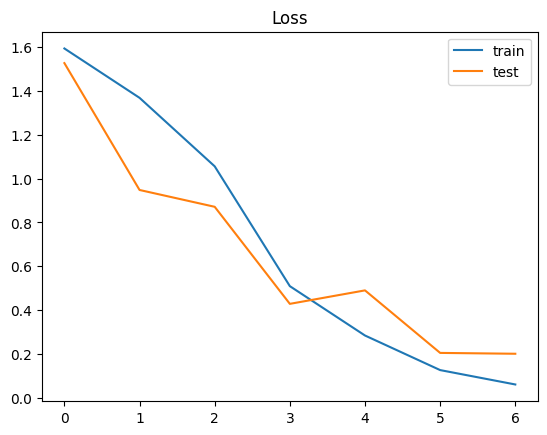

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

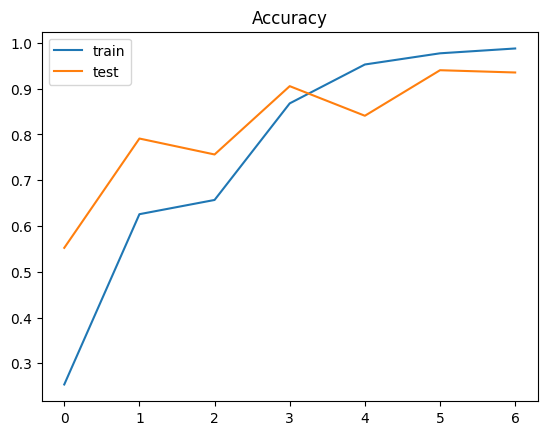

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
new_complaint = ['Cricket Australia is set to begin the team’s pre-season later this month under a set of new training protocols devised for the safety of players amid the COVID-19 pandemic.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)

labels = ['Business','Entertainment','Politics','Sports','Tech']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 307ms/step
[[0.00852136 0.00510562 0.00255992 0.98045623 0.00335691]] Sports


In [ ]:
pred

array([[0.00852136, 0.00510562, 0.00255992, 0.98045623, 0.00335691]],
      dtype=float32)

## **Hyperparameter tuning**

In [ ]:
def run_experiment(batch_size, epochs, drop_ratio):
  print('batch size: {}, epochs: {}, drop_ratio: {}'.format(
      batch_size, epochs, drop_ratio))

  model=Sequential()
  model.add(Embedding(number_of_words,100,input_length=max_length))
  model.add(SpatialDropout1D(drop_ratio))
  model.add(LSTM(100, dropout=drop_ratio, recurrent_dropout=drop_ratio))
  model.add(Dense(5, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


  history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

  score = model.evaluate(X_test, Y_test,
                       batch_size=batch_size, verbose=0)
  print('\tTest loss:', score[0])
  print('\tTest accuracy:', score[1])

In [ ]:
batch_size = 64
epochs = 7
drop_ratio = 0.2
run_experiment(batch_size, epochs, drop_ratio)

batch size: 64, epochs: 7, drop_ratio: 0.2
Epoch 1/7
29/29 [==============================] - 37s 1s/step - loss: 1.5844 - accuracy: 0.2537 - val_loss: 1.5215 - val_accuracy: 0.6070
Epoch 2/7
29/29 [==============================] - 49s 2s/step - loss: 1.1956 - accuracy: 0.6197 - val_loss: 0.8333 - val_accuracy: 0.7562
Epoch 3/7
29/29 [==============================] - 46s 2s/step - loss: 0.6273 - accuracy: 0.7973 - val_loss: 0.4421 - val_accuracy: 0.8905
Epoch 4/7
29/29 [==============================] - 37s 1s/step - loss: 0.4249 - accuracy: 0.9145 - val_loss: 0.4421 - val_accuracy: 0.8706
Epoch 5/7
29/29 [==============================] - 32s 1s/step - loss: 0.2382 - accuracy: 0.9745 - val_loss: 0.2383 - val_accuracy: 0.9552
Epoch 6/7
29/29 [==============================] - 31s 1s/step - loss: 0.1212 - accuracy: 0.9845 - val_loss: 0.2929 - val_accuracy: 0.9303
Epoch 7/7
29/29 [==============================] - 32s 1s/step - loss: 0.0354 - accuracy: 0.9972 - val_loss: 0.1198 - val_a

## **Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [ ]:
len(Y_test)

223

In [ ]:
model.evaluate(X_test,Y_test)

7/7 [==============================] - 2s 266ms/step - loss: 0.3998 - accuracy: 0.8924


[0.3997960686683655, 0.8923766613006592]

In [ ]:
predictions = model.predict(X_test)

7/7 [==============================] - 1s 198ms/step


In [ ]:
y_test_1d = []
y_pred_1d = []

for i in range(len(Y_test)):
  y_test_1d.append(labels[np.argmax(Y_test[i])])
  y_pred_1d.append(labels[np.argmax(predictions[i])])